In [4]:
#hypothesis 1 : 1.	Higher BMI is associated with an increased risk of diabetes.
#                   •	Patients with a BMI > 30 are more likely to be diabetic than those with a normal BMI.
import os
current_dir = os.getcwd()
current_dir

'/Users/jacobambat/dev/Diabetes_DA_project/jupyter_notebooks'

In [5]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [6]:
current_dir = os.getcwd()
current_dir

'/Users/jacobambat/dev/Diabetes_DA_project'

In [7]:
DestinationFolder = "dataset/cleaned"

In [8]:
# Importing the Pandas library
import pandas as pd

# Loading the dataset
df = pd.read_csv(f'{DestinationFolder}/datacleanup2.csv')

# Displaying the first few rows of the dataset
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,AGE
0,Female,61.0,1,1,ever,32.36,5.8,130,0,61
1,Male,44.0,0,0,not current,30.49,3.5,130,0,44
2,Male,23.0,0,0,never,34.55,6.1,90,0,23
3,Male,68.0,1,1,current,27.32,8.8,155,1,68
4,Female,24.0,0,0,former,21.63,6.1,126,0,24


In [9]:
import numpy as np
import pandas as pd

In [10]:
# Define BMI categories using apply and lambda and using discretisation and binning the bmi categories
df["BMI_Category"] = df["bmi"].apply(lambda x: 
                                     "Underweight" if x < 18.5 else 
                                     "Normal weight" if x < 25 else 
                                     "Overweight" if x < 30 else 
                                     "Obese")

# Print the DataFrame
print(df)

      gender   age  hypertension  heart_disease smoking_history    bmi  \
0     Female  61.0             1              1            ever  32.36   
1       Male  44.0             0              0     not current  30.49   
2       Male  23.0             0              0           never  34.55   
3       Male  68.0             1              1         current  27.32   
4     Female  24.0             0              0          former  21.63   
...      ...   ...           ...            ...             ...    ...   
9806    Male  67.0             0              0           never  35.95   
9807  Female  13.0             0              0           never  19.66   
9808    Male  14.0             0              0         No Info  18.95   
9809    Male   2.0             0              0         No Info  14.66   
9810    Male  20.0             0              0           never  33.98   

      HbA1c_level  blood_glucose_level  diabetes  AGE   BMI_Category  
0             5.8                  130  

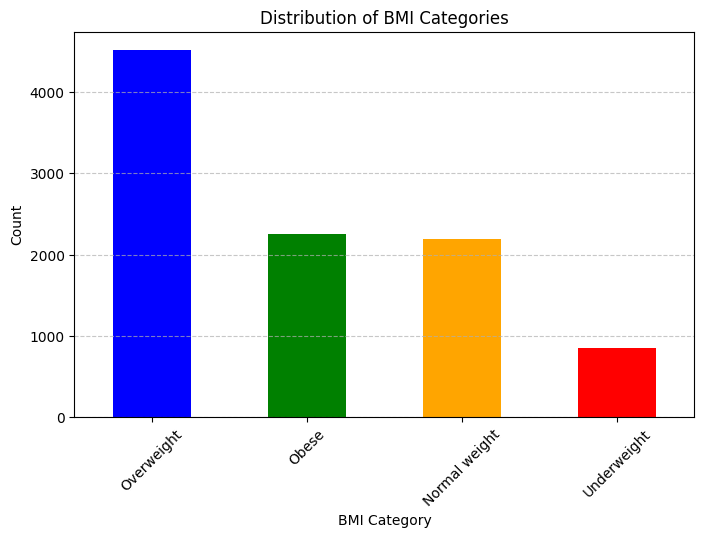

In [11]:
# Matplotlib - Bar plot shows obese individuals have BMI > 30 
import matplotlib.pyplot as plt
# Count occurrences of each BMI category
bmi_counts = df["BMI_Category"].value_counts()

# Plot the BMI categories as a bar chart
plt.figure(figsize=(8, 5))
bmi_counts.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.title("Distribution of BMI Categories")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

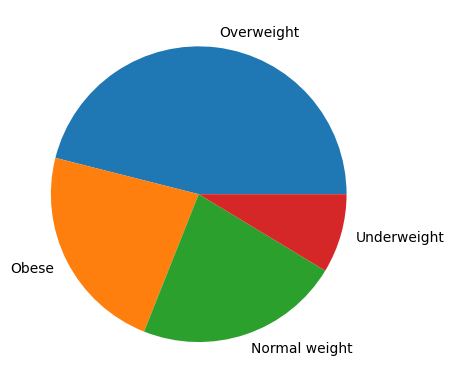

In [12]:
#Matplotlib - piechart
categorical_count = df.value_counts('BMI_Category',normalize=True)
plt.pie(x=categorical_count, labels=categorical_count.index)
plt.show()

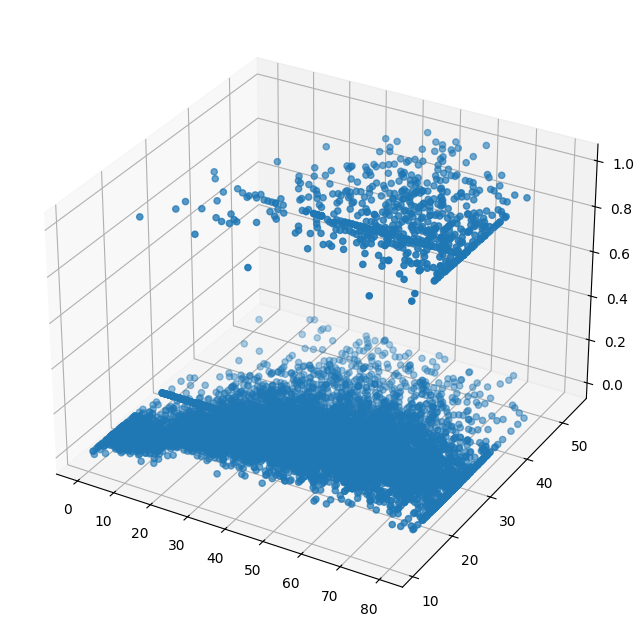

In [13]:
#Matplotlib - 3D plot
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

x = df['AGE']
y = df['bmi']
z = df["diabetes"]

ax.scatter(x, y, z)
plt.show()

In [14]:
import seaborn as sns
sns.set_style('whitegrid')

In [15]:
df_bmi_diabetes = df[["BMI_Category", 'diabetes']]
df_bmi_diabetes.dtypes

BMI_Category    object
diabetes         int64
dtype: object

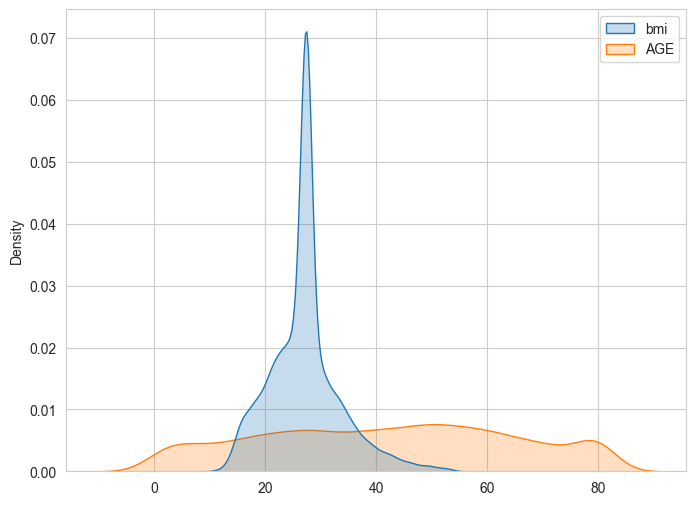

In [16]:
#seaborn - kde plot shows the high bmi density between age 20 to 40 
fig,ax = plt.subplots(figsize =(8,6))
sns.kdeplot(data=df.filter(['bmi','AGE'], axis=1), fill=True)

plt.show()

In [17]:
# Calculate correlation between Obesity and Diabetes.
# Pearson correlation between Obesity and Diabetes.
df["Obese"] = df["bmi"].apply(lambda x: 1 if x >= 30 else 0)
correlation = df[["Obese", "diabetes"]].corr()

# Print correlation value
print(correlation)

           Obese  diabetes
Obese     1.0000    0.1531
diabetes  0.1531    1.0000


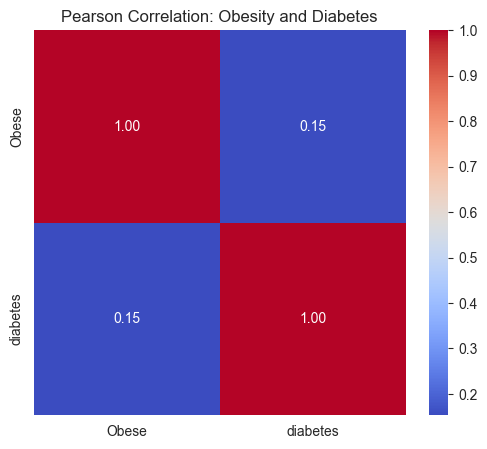

In [18]:
# seaborn - heatmap for pearson correlation
plt.figure(figsize=(6,5))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation: Obesity and Diabetes")
plt.show()

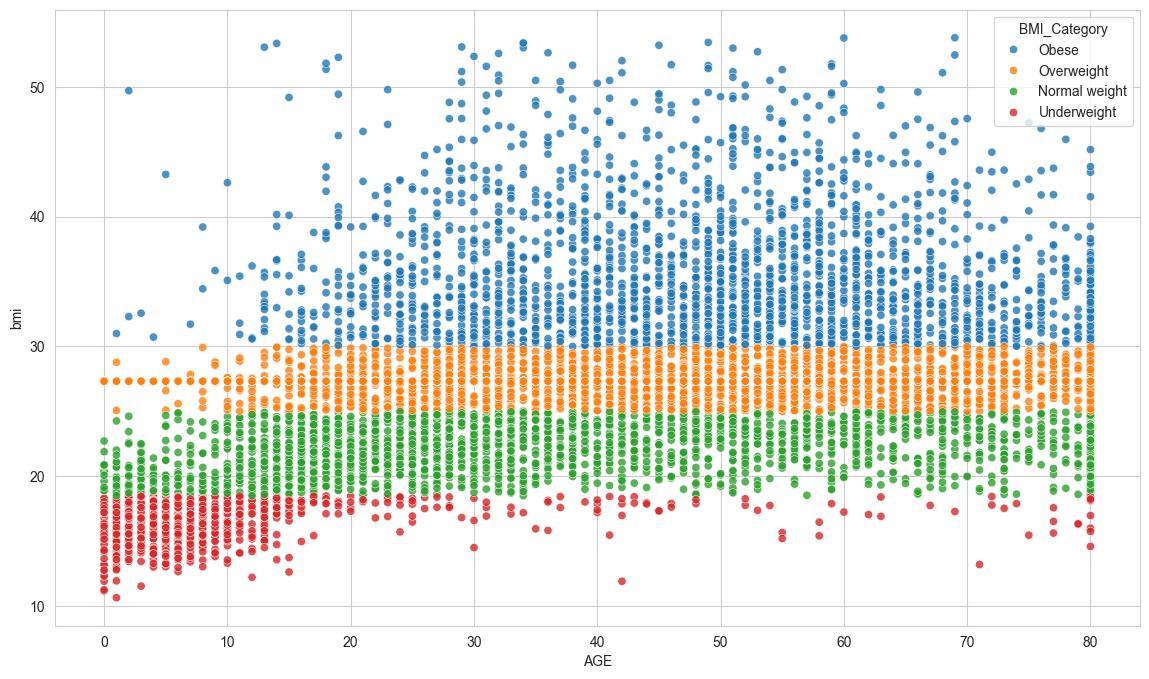

In [19]:
#seaborn - scatterplot
fig, axes = plt.subplots(figsize=(14,8))
sns.scatterplot(data=df, x='AGE', y='bmi',
                hue='BMI_Category',sizes=(40, 200),
                alpha=0.8)
plt.show()

In [20]:
import plotly.express as px

In [23]:
#Plotly - scatterplot
fig = px.scatter(data_frame=df, x="AGE", y='bmi')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [27]:
#Plotly - Area plot
fig = px.area(df,x='diabetes', y='bmi', color='BMI_Category')
fig.show()

In [29]:
#plotly - boxplot
fig = px.box(df, x="age", y="bmi", color="BMI_Category")
fig.show()